In [38]:
# Importing necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import tweepy
from wordcloud import WordCloud
import re 
from textblob import TextBlob 

In [27]:
df_api = pd.read_csv(r"C:\Users\uday\Documents\YASHAS\Twitter\Twitter API.csv")
df_api

,API Key,API Secret Key,Bearer Token,Access Token,Access Token Secret,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2t92JZAUUknMjxREtvxaxaKbY,ZybM7YbJw4IcsaTLumYXjqh9mDUSSKktYq9jnttOGVwlhi...,AAAAAAAAAAAAAAAAAAAAAN6LXgEAAAAABxRHtEc4NPB%2F...,2994848874-ZnV5fxSjI1Dx09XjMHtouj57MDzS6h81r5b...,GWsrEzFThouEzUlQqWkwmvoxKFGK246FRvjsOuZ0tg6Ds,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,app name: Sentiment_analysis_research


In [28]:
# Getting the Twitter Credentials 
apiKey = df_api['API Key'][0]
apiSecret = df_api['API Secret Key'][0]
access = df_api['Access Token'][0]
accessSecret = df_api['Access Token Secret'][0]

In [29]:
# Create an Authentication Object

authenticate = tweepy.OAuthHandler(apiKey, apiSecret)

# Set the access token and access secret token 

authenticate.set_access_token(access, accessSecret)

# Create the Api Object while passing the auth information 

api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [54]:
# Extracting tweets from a user 

posts = api.user_timeline(screen_name='elonmusk', count=100, lang='en', tweet_mode='extended')

Unexpected parameter: lang


In [55]:
# Creating a data frame of the tweets 
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df


,Tweets
0,@BLKMDL3 @Tesla 🔥
1,@MiFSDBetaTester @WholeMarsBlog 🤣
2,@TheBabylonBee 🤣
3,@roshanpateI 🤣 $7
4,@tesla_raj Many UI improvements coming
...,...
95,@stevenmarkryan @neuralink Words are very loss...
96,@teslaownersSV @SpaceX Long way to go to perfe...
97,@Erdayastronaut @SkepticsGuide Sounds like a g...
98,"@wintonARK It may, especially in our galaxy at..."


In [56]:
# cleaning the text

# defining a function to clean all the @, # , whitespaces and hyperlinks

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    # text = re.sub(r'RT[\s]+', '', text)
    # text = re.sub(r'https?:\/\/\s', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanText)



In [57]:
df

,Tweets
0,🔥
1,🤣
2,🤣
3,🤣 $7
4,_raj Many UI improvements coming
...,...
95,Words are very lossy compression of thoughts
96,"Long way to go to perfect it, but Starship i..."
97,Sounds like a good book
98,"It may, especially in our galaxy at this time"


In [59]:
# Defining functions to get polarity for the tweets 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity



def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

# create a new column called polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)



In [76]:
df.head(-5)

,Tweets,Subjectivity,Polarity
0,🔥,0.000000,0.000000
1,🤣,0.000000,0.000000
2,🤣,0.000000,0.000000
3,🤣 $7,0.000000,0.000000
4,_raj Many UI improvements coming,0.500000,0.500000
...,...,...,...
90,Yeah,0.000000,0.000000
91,I’m not suggesting web3 is real – seems more m...,0.472143,0.047143
92,Might very well be,0.300000,0.200000
93,Given the almost unimaginable nature of the pr...,0.062500,0.000000


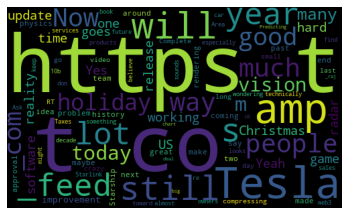

In [66]:
# getting the word cloud 

allwords = ' '.join([x for x in df['Tweets']])
wordcloud = WordCloud(width = 500, height=300, max_words=100, background_color='black', random_state=15 ).generate(allwords)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [64]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

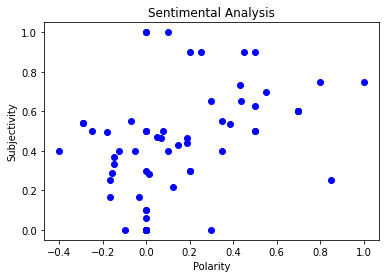

In [78]:
# Plotting the polarity and subjectivity


plt.scatter(df['Polarity'], df['Subjectivity'], color='blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title("Sentimental Analysis")
plt.show()


In [85]:
help(api.user_timeline)

Help on method user_timeline in module tweepy.api:

user_timeline(**kwargs) method of tweepy.api.API instance
    user_timeline(*, user_id, screen_name, since_id, count, max_id,                          trim_user, exclude_replies, include_rts)
    
    Returns the 20 most recent statuses posted from the authenticating user
    or the user specified. It's also possible to request another user's
    timeline via the id parameter.
    
    Parameters
    ----------
    user_id
        |user_id|
    screen_name
        |screen_name|
    since_id
        |since_id|
    count
        |count|
    max_id
        |max_id|
    trim_user
        |trim_user|
    exclude_replies
        |exclude_replies|
    include_rts
        When set to ``false``, the timeline will strip any native retweets
        (though they will still count toward both the maximal length of the
        timeline and the slice selected by the count parameter). Note: If
        you're using the trim_user parameter in conjunctio